In [ ]:
"""
TMAX - Maximum temperature
TAVG - Average Temperature.
TMIN - Minimum temperature
PRCP - Precipitation
SNWD - Snow depth 
"""

In [9]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("noaa_istanbul_2005_2021.csv")

In [3]:
df.head()

,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,TU000017062,"ISTANBUL, TU",2007-04-19,NaN,NaN,11.8,14.8,NaN
1,TU000017062,"ISTANBUL, TU",2007-04-20,0.3,NaN,13.1,17.6,6.0
2,TU000017062,"ISTANBUL, TU",2007-04-21,0.0,NaN,14.3,21.0,6.9
3,TU000017062,"ISTANBUL, TU",2007-04-22,0.0,NaN,14.4,22.2,9.3
4,TU000017062,"ISTANBUL, TU",2007-04-23,0.0,NaN,12.8,17.7,8.6


In [5]:
Counter(df.STATION)

Counter({'TU000017062': 18, 'TUM00017064': 2502})

In [6]:
df.isna().sum()

STATION       0
NAME          0
DATE          0
PRCP        751
SNWD       2443
TAVG          0
TMAX       1184
TMIN        737
dtype: int64

In [7]:
df.shape

(2520, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  2520 non-null   object 
 1   NAME     2520 non-null   object 
 2   DATE     2520 non-null   object 
 3   PRCP     1769 non-null   float64
 4   SNWD     77 non-null     float64
 5   TAVG     2520 non-null   float64
 6   TMAX     1336 non-null   float64
 7   TMIN     1783 non-null   float64
dtypes: float64(5), object(3)
memory usage: 157.6+ KB


In [12]:
df["DATE"] = pd.to_datetime(df["DATE"])

In [64]:
df.DATE.dt.year.unique()

array([2007, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

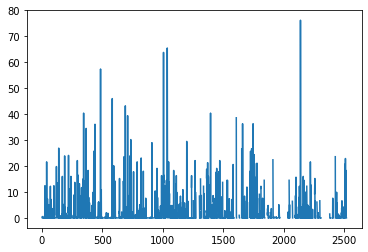

In [13]:
plt.plot(df.PRCP)

In [17]:
Counter(df[df.PRCP.isna()].DATE.dt.year)

Counter({2007: 5,
         2014: 17,
         2015: 7,
         2016: 11,
         2017: 110,
         2018: 164,
         2019: 225,
         2020: 210,
         2021: 2})

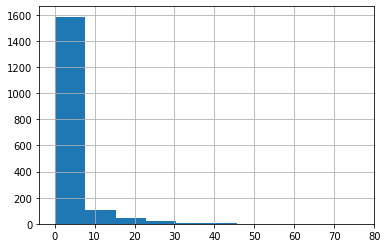

In [48]:
df.PRCP.hist()

In [52]:
c = Counter(df.PRCP)
c.most_common(3)

[(0.0, 1017), (0.3, 85), (0.5, 76)]

In [53]:
df["PRCP"] = df["PRCP"].fillna(0)

In [54]:
df = df[["DATE", "PRCP", "TAVG"]]

In [56]:
df_dam = pd.read_csv("dam_occupancy.csv")

In [57]:
df_dam.head()

,DATE,GENERAL_DAM_OCCUPANCY_RATE,GENERAL_DAM_RESERVED_WATER
0,2005-01-01,44.62,388
1,2005-01-02,44.62,388
2,2005-01-03,44.47,386
3,2005-01-04,44.42,386
4,2005-01-05,44.35,385


In [58]:
df_dam["DATE"] = pd.to_datetime(df_dam["DATE"])

In [59]:
df_merged = pd.merge(df_dam, df, how="inner", on="DATE")

In [62]:
df_merged.sort_values("DATE").head()

,DATE,GENERAL_DAM_OCCUPANCY_RATE,GENERAL_DAM_RESERVED_WATER,PRCP,TAVG
0,2007-04-19,51.97,451,0.0,11.8
1,2007-04-20,51.86,451,0.3,13.1
2,2007-04-21,51.61,448,0.0,14.3
3,2007-04-22,51.43,447,0.0,14.4
4,2007-04-23,51.24,445,0.0,12.8


In [63]:
df.head()

,DATE,PRCP,TAVG
0,2007-04-19,0.0,11.8
1,2007-04-20,0.3,13.1
2,2007-04-21,0.0,14.3
3,2007-04-22,0.0,14.4
4,2007-04-23,0.0,12.8


In [65]:
df_merged.shape

(2473, 5)

In [66]:
df_merged.to_csv("dam_with_weather.csv", index=False)